## 1.2. Limpieza y manipulación de datos

A continuación, se realizan las acciones especificadas en el apartado previo de Análisis Exploratorio de Datos. 

In [1]:
#Librerías a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Se importa el set de datos
job_positions = pd.read_csv('./dataset/Cleaned_DS_Jobs.csv')

##### Situación inicial de nuestro set de datos. Todos los cambios los guardaremos finalmente en un nuevo .csv

In [3]:
job_positions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          660 non-null    object 
 1   Salary Estimate    660 non-null    object 
 2   Job Description    660 non-null    object 
 3   Rating             660 non-null    float64
 4   Company Name       660 non-null    object 
 5   Location           660 non-null    object 
 6   Headquarters       660 non-null    object 
 7   Size               660 non-null    object 
 8   Type of ownership  660 non-null    object 
 9   Industry           660 non-null    object 
 10  Sector             660 non-null    object 
 11  Revenue            660 non-null    object 
 12  min_salary         660 non-null    int64  
 13  max_salary         660 non-null    int64  
 14  avg_salary         660 non-null    int64  
 15  job_state          660 non-null    object 
 16  same_state         660 non

#### Acción 2: Recategorizar los 'na' de la columna job_simp y eliminar los 'na' restantes al no tratarse de posiciones dentro del sector de data.

In [4]:
def title_simplifier(title):
    if 'data science software engineer' in title.lower():
        return 'data engineer'
    elif 'software engineer - data science' in title.lower():
        return 'data engineer'
    elif 'data science' in title.lower():
        return 'data scientist'
    elif 'statistical scientist' in title.lower():
        return 'data scientist'
    elif 'ai scientist' in title.lower():
        return 'data scientist'
    elif 'software' in title.lower():
        return 'data engineer'
    elif 'data modeler' in title.lower():
        return 'data engineer'
    elif 'modeling engineer' in title.lower():
        return 'data engineer'
    elif 'data architect' in title.lower():
        return 'data engineer'
    elif 'engineering scientist' in title.lower():
        return 'data engineer'
    elif 'analytical' in title.lower():
        return 'analyst'
    elif 'analytics' in title.lower():
        return 'analyst'
    elif 'computer' in title.lower():
        return 'computer scientist'
    elif 'computational' in title.lower():
        return 'computer scientist'
    else:
        return 'na'

In [5]:
job_positions['job_simp'] = job_positions.apply(
    lambda row: title_simplifier(row['Job Title']) if row['job_simp'] == 'na' else row['job_simp'],
    axis=1
)

In [6]:
job_positions.job_simp.value_counts()

job_simp
data scientist        456
data engineer          59
analyst                58
mle                    34
na                     29
computer scientist     14
manager                 7
director                3
Name: count, dtype: int64

In [7]:
job_positions[job_positions['job_simp'] == 'manager']

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
83,"Data Science Manager, Payment Acceptance - USA",79-131,Build out rigorous observability and optimizat...,4.0,Stripe,"San Francisco, CA","San Francisco, CA",1001 to 5000 employees,Company - Private,Internet,...,10,1,0,0,0,0,0,0,manager,na
143,Analytics Manager,90-109,Responsible for both high level and granular m...,4.4,OneMagnify,"Dearborn, MI","Detroit, MI",201 to 500 employees,Company - Private,Advertising & Marketing,...,53,0,1,0,0,0,1,0,manager,na
210,Analytics Manager - Data Mart,79-106,We have an opportunity to join the Alliance as...,3.5,Central California Alliance for Health,"Scotts Valley, CA","Scotts Valley, CA",501 to 1000 employees,Nonprofit Organization,Health Care Services & Hospitals,...,24,0,0,0,0,0,1,0,manager,na
263,"Manager / Lead, Data Science & Analytics",91-150,Search by Keyword\nMore Options\n\nSearch by L...,4.1,ABIOMED,"Danvers, MA","Danvers, MA",1001 to 5000 employees,Company - Public,Biotech & Pharmaceuticals,...,39,1,1,0,0,0,1,0,manager,senior
371,Analytics Manager - Data Mart,112-116,We have an opportunity to join the Alliance as...,3.5,Central California Alliance for Health,"Scotts Valley, CA","Scotts Valley, CA",501 to 1000 employees,Nonprofit Organization,Health Care Services & Hospitals,...,24,0,0,0,0,0,1,0,manager,na
513,"Manager, Field Application Scientist, Southeast",212-331,"At 10x Genomics, accelerating our understandin...",4.2,10x Genomics,"Raleigh, NC","Pleasanton, CA",501 to 1000 employees,Company - Public,Biotech & Pharmaceuticals,...,8,0,1,0,0,0,0,0,manager,na
554,Data Science Manager,128-201,Job Requisition ID #\n20WD38093\nJob Title\nDa...,4.0,Autodesk,"San Francisco, CA","San Rafael, CA",5001 to 10000 employees,Company - Public,Computer Hardware & Software,...,38,1,1,1,1,0,0,1,manager,na


In [8]:
job_positions[job_positions['job_simp'] == 'na']['Job Title'].value_counts()

Job Title
Decision Scientist                                                                          3
Scientist / Group Lead, Cancer Biology                                                      2
Senior Scientist - Toxicologist - Product Integrity (Stewardship)                           2
Weapons and Sensors Engineer/Scientist                                                      2
Research Scientist - Patient-Centered Research (Remote)                                     2
Medical Lab Scientist                                                                       1
Real World Evidence (RWE) Scientist                                                         1
Sr. Research Associate/ Scientist, NGS prep & Molecular Genomics                            1
Vice President, Biometrics and Clinical Data Management                                     1
Scientist/Research Associate-Metabolic Engineering                                          1
Lead Certified Clinical Laboratory Scientist - Sat

Oservamos que el resto de 'na' en job_simp son posiciones de trabajo que no pertenecen al mundo del data, por lo que procedemos a eliminarlas de nuestro set de datos.

In [9]:
job_positions = job_positions[job_positions['job_simp'] != 'na']

#### Acción 7: Agrupar la columna 'Location' por estado en lugar de por ciudad, la llamaremos 'State'

In [10]:
# Extraemos el estado del campo 'Location'
job_positions['State'] = job_positions['Location'].apply(lambda x: x.split(', ')[-1])

job_positions['State'].value_counts()

State
CA               159
VA                88
MA                57
NY                51
MD                33
IL                30
DC                26
TX                17
WA                16
OH                14
MO                12
United States     11
PA                11
CO                10
NJ                 9
GA                 9
FL                 8
TN                 8
NC                 7
OK                 6
WI                 5
MI                 5
IN                 5
CT                 4
MN                 4
IA                 3
AZ                 3
UT                 3
NE                 3
AL                 2
OR                 2
RI                 2
NH                 2
MS                 1
LA                 1
SC                 1
KS                 1
DE                 1
WV                 1
Name: count, dtype: int64

Como seguimos teniendo muchos valores únicos, mantendremos los 10 primeros valores de la columna y etiquetaremos el resto como 'OTHER'. Además, vemos que 'United States' no es un estado, también lo clasificaremos como 'OTHER'.

In [11]:
# Contamos la frecuencia de cada valor en la columna
frecuencia_estados = job_positions['State'].value_counts()

#Definimos el top 10
top_10_estados = frecuencia_estados.index[:10]

# Reemplazamos los valores menos frecuentes con 'OTHER' mediante una f(x) lambda
job_positions['State'] = job_positions['State'].apply(lambda x: x if x in top_10_estados else 'OTHER')

In [12]:
job_positions['State'].value_counts()

State
CA       159
OTHER    140
VA        88
MA        57
NY        51
MD        33
IL        30
DC        26
TX        17
WA        16
OH        14
Name: count, dtype: int64

#### Acción 8: Agrupar la columna 'Headquarters' por país

En primer lugar arreglaremos los datos con valor '-1',que entendemos que son valores de los que no se dispone información, y le asignaremos el valor de la columna 'Location'.

In [13]:
job_positions['Headquarters'] = job_positions.apply(
    lambda row: row['Location'] if row['Headquarters'] == '-1' else row['Headquarters'],
    axis=1
)

Arreglamos un error de sintaxis.

In [14]:
job_positions['Headquarters'] = job_positions['Headquarters'].apply(lambda x: 'New York, NY' if x == 'New York, 061' else x)

In [15]:
#Se ajustan las impresiones de columnas y filas
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', None)

Extraemos el páis, en el lado derecho de la coma.

In [16]:
# Extraemos el país
job_positions['Headquarters'] = job_positions['Headquarters'].apply(lambda x: x.split(', ')[-1])

job_positions['Headquarters'].value_counts()

Headquarters
CA                141
VA                 86
MA                 51
NY                 42
IL                 35
MD                 28
NJ                 28
CO                 21
TX                 20
WA                 15
PA                 13
United Kingdom     13
FL                 12
OH                 11
MO                 10
Switzerland         9
MN                  8
NC                  7
CT                  7
TN                  7
NE                  5
DC                  5
France              4
IN                  4
GA                  4
AZ                  4
IA                  4
Canada              4
WI                  4
MI                  4
SC                  3
India               3
AL                  2
WV                  2
OR                  2
Bermuda             2
UT                  2
Japan               2
Singapore           2
Israel              1
LA                  1
Sweden              1
HI                  1
Spain               1
Name: count, dtype:

Creamos una lista con los países claros, y al resto, que son los que se especifica el estado de EEUU, le asignamos el país Estados Unidos.

In [17]:
countries = ('United Kingdom','Switzerland','France','Canada','India','Bermuda','Singapore','Japan','Spain','Sweden','Israel')
job_positions['Headquarters'] = job_positions['Headquarters'].apply(lambda x: x if x in countries else 'United States')

Se muestra el resultado.

In [18]:
job_positions['Headquarters'].value_counts()

Headquarters
United States     589
United Kingdom     13
Switzerland         9
France              4
Canada              4
India               3
Singapore           2
Japan               2
Bermuda             2
Israel              1
Sweden              1
Spain               1
Name: count, dtype: int64

#### Acción 9: Corregir los -1 de la columna 'Size' como 'Unknown'

Recategorizamos -1 como 'Unknown'.

In [19]:
job_positions['Size'] = job_positions['Size'].apply(lambda x: 'Unknown' if x == '-1' else x)

Resultado:

In [20]:
job_positions['Size'].value_counts()

Size
51 to 200 employees        123
1001 to 5000 employees     100
1 to 50 employees           83
201 to 500 employees        80
10000+ employees            77
501 to 1000 employees       72
5001 to 10000 employees     55
Unknown                     41
Name: count, dtype: int64

#### Acción 10: Corregir los -1 de la columna 'Type of ownership'  y reorganizar valores para tener menos columnas

Creamos una lista con las etiquetas que reclasificaremos como 'Others'.

In [21]:
list_others =('-1','Other Organization','Unknown','College / University','Self-employed','Contract','Hospital')

Definimos una función para corregir los errores.

In [22]:
def map_ownership(x):
    if x == 'Private Practice / Firm':
        return 'Company - Private'
    elif x in list_others:
        return 'Others'
    else:
        return x

job_positions['Type of ownership'] = job_positions['Type of ownership'].apply(map_ownership)

Imprimimos el resultado

In [23]:
job_positions['Type of ownership'].value_counts()

Type of ownership
Company - Private                 378
Company - Public                  146
Others                             41
Nonprofit Organization             32
Subsidiary or Business Segment     25
Government                          9
Name: count, dtype: int64

#### Acción 12:  Modificar el valor -1 de la columna 'Sector' por 'Unknown'.

Se realizan los cambios.

In [24]:
job_positions['Sector'] = job_positions['Sector'].apply(lambda x: 'Unknown' if x == '-1' else x)

Se imprime el resultado.

In [25]:
job_positions['Sector'].value_counts()

Sector
Information Technology                178
Business Services                     119
Unknown                                67
Biotech & Pharmaceuticals              52
Aerospace & Defense                    41
Insurance                              32
Finance                                31
Manufacturing                          21
Health Care                            19
Government                             16
Oil, Gas, Energy & Utilities           10
Telecommunications                      7
Retail                                  7
Transportation & Logistics              6
Media                                   5
Real Estate                             3
Travel & Tourism                        3
Agriculture & Forestry                  3
Education                               3
Accounting & Legal                      3
Construction, Repair & Maintenance      2
Consumer Services                       2
Non-Profit                              1
Name: count, dtype: int64

#### Acción 13: Modificaremos el valor -1 por 'Unknown' para la variable 'Revenue'

Se realizan los cambios.

In [26]:
job_positions['Revenue'] = job_positions['Revenue'].apply(lambda x: 'Unknown / Non-Applicable' if x == '-1' else x)

Se imprime el resultado.

In [27]:
job_positions['Revenue'].value_counts()

Revenue
Unknown / Non-Applicable            222
$100 to $500 million (USD)           85
$10+ billion (USD)                   59
$2 to $5 billion (USD)               44
$10 to $25 million (USD)             40
$25 to $50 million (USD)             35
$1 to $2 billion (USD)               33
$1 to $5 million (USD)               31
$50 to $100 million (USD)            29
$500 million to $1 billion (USD)     19
$5 to $10 million (USD)              14
Less than $1 million (USD)           12
$5 to $10 billion (USD)               8
Name: count, dtype: int64

#### Acción 15: Cambiar el valor -1 de la columna 'company_age' a 1.

Se realizan los cambios.

In [28]:
job_positions['company_age'] = job_positions['company_age'].apply(lambda x: 1 if x == -1 else x)

Se imprime el resultado.

In [29]:
job_positions['company_age'].value_counts()

company_age
1      118
8       34
9       25
10      22
24      22
21      22
5       18
20      15
14      15
17      13
12      13
4       12
11      12
107     10
15      10
22      10
28       9
7        9
23       8
6        8
73       8
19       7
38       7
2        7
26       6
44       6
18       6
25       6
13       6
34       6
39       6
30       6
52       5
53       5
109      5
37       5
169      5
16       5
35       4
47       4
3        4
87       4
62       4
167      3
33       3
31       3
51       3
66       3
36       3
72       3
27       3
69       3
55       3
32       3
49       3
95       3
42       3
54       3
103      2
40       2
140      2
108      2
239      2
102      2
75       2
50       2
170      2
133      2
46       2
74       2
57       2
112      2
81       1
106      1
122      1
64       1
124      1
48       1
190      1
43       1
88       1
160      1
83       1
63       1
67       1
157      1
94       1
171      1
65       1
85       

#### Acción 17: Crear nuevas columnas de habiliades en base a la columna Job Description

In [30]:
job_positions['bi_tools'] = job_positions['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() or 'qlik' in x.lower() or 'power bi' in x.lower() else 0)
job_positions['bi_tools'].value_counts()

bi_tools
0    500
1    131
Name: count, dtype: int64

Eliminaremos la columna tableau y la sustituiremos por bi_tools, que incluye otras herramientas del top 3 del cuadrante de Gartner: Tableau, Power BI y Qlik.

In [31]:
job_positions['sql'] = job_positions['Job Description'].apply(lambda x: 1 if 'sql' in x.lower()else 0)
job_positions['sql'].value_counts()

sql
1    351
0    280
Name: count, dtype: int64

In [32]:
job_positions['git'] = job_positions['Job Description'].apply(lambda x: 1 if 'git' in x.lower()else 0)
job_positions['git'].value_counts()

git
0    487
1    144
Name: count, dtype: int64

#### Acción 1,3,4,5,11,14,16: Eliminar columnas

Creamos una lista con las columnas a eliminar

In [33]:
columnas_eliminar = ['Job Title','Salary Estimate','min_salary','max_salary','Job Description','Rating','Company Name','Industry','seniority','tableau','Location','job_state']

Eliminamos las columnas de nuestro set de datos

In [34]:
job_positions = job_positions.drop(columns=columnas_eliminar)

##### Situación final de nuestro set de datos.

In [35]:
job_positions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 631 entries, 0 to 659
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Headquarters       631 non-null    object
 1   Size               631 non-null    object
 2   Type of ownership  631 non-null    object
 3   Sector             631 non-null    object
 4   Revenue            631 non-null    object
 5   avg_salary         631 non-null    int64 
 6   same_state         631 non-null    int64 
 7   company_age        631 non-null    int64 
 8   python             631 non-null    int64 
 9   excel              631 non-null    int64 
 10  hadoop             631 non-null    int64 
 11  spark              631 non-null    int64 
 12  aws                631 non-null    int64 
 13  big_data           631 non-null    int64 
 14  job_simp           631 non-null    object
 15  State              631 non-null    object
 16  bi_tools           631 non-null    int64 
 17  sq

Generamos una matriz de correlaciones entre nuestras varibles numéricas.

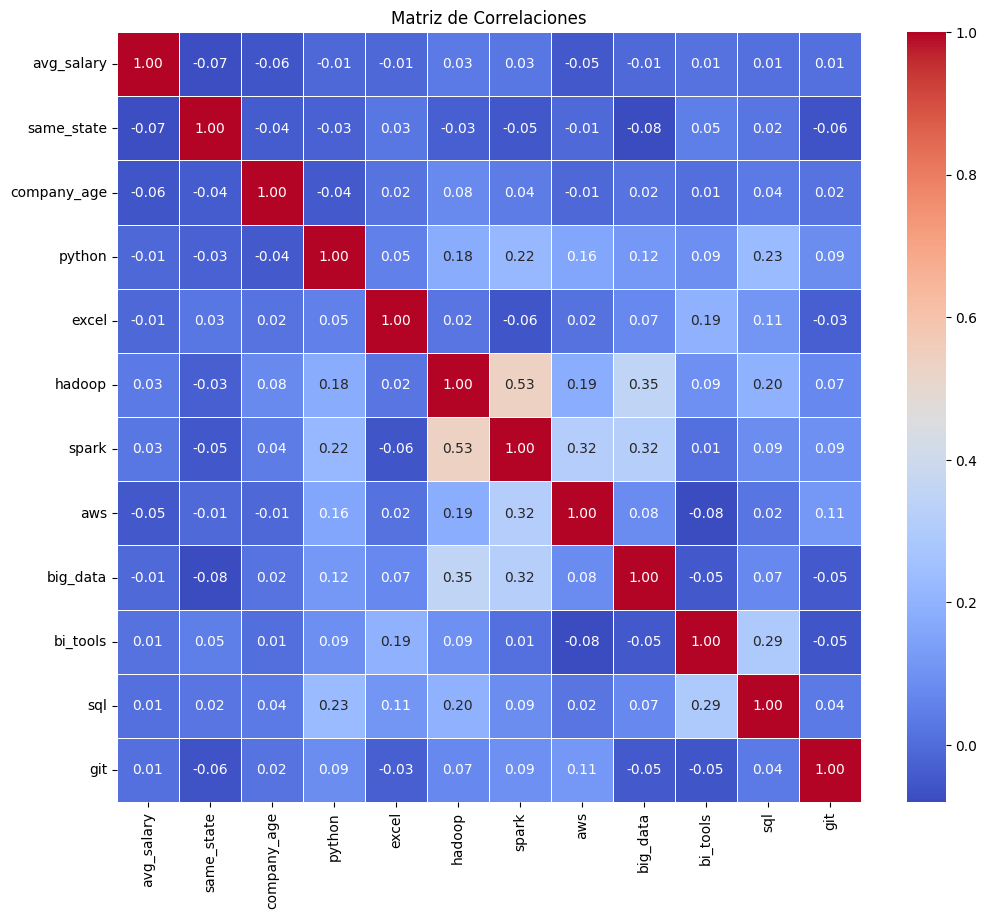

In [36]:
columnas_numericas = job_positions.select_dtypes(include=['number'])

matriz_correlaciones = columnas_numericas.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlaciones, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlaciones')
plt.show()

A primera vista, parece que no existe una alta correlación entre las varibles numéricas de nuestro modelo. Tendremos que comprobar la correlación posteriormente cuando convirtamos nuestras variables categóricas a numéricas a lo largo del proceso de entrenamiento de los modelos de aprendizaje automático.

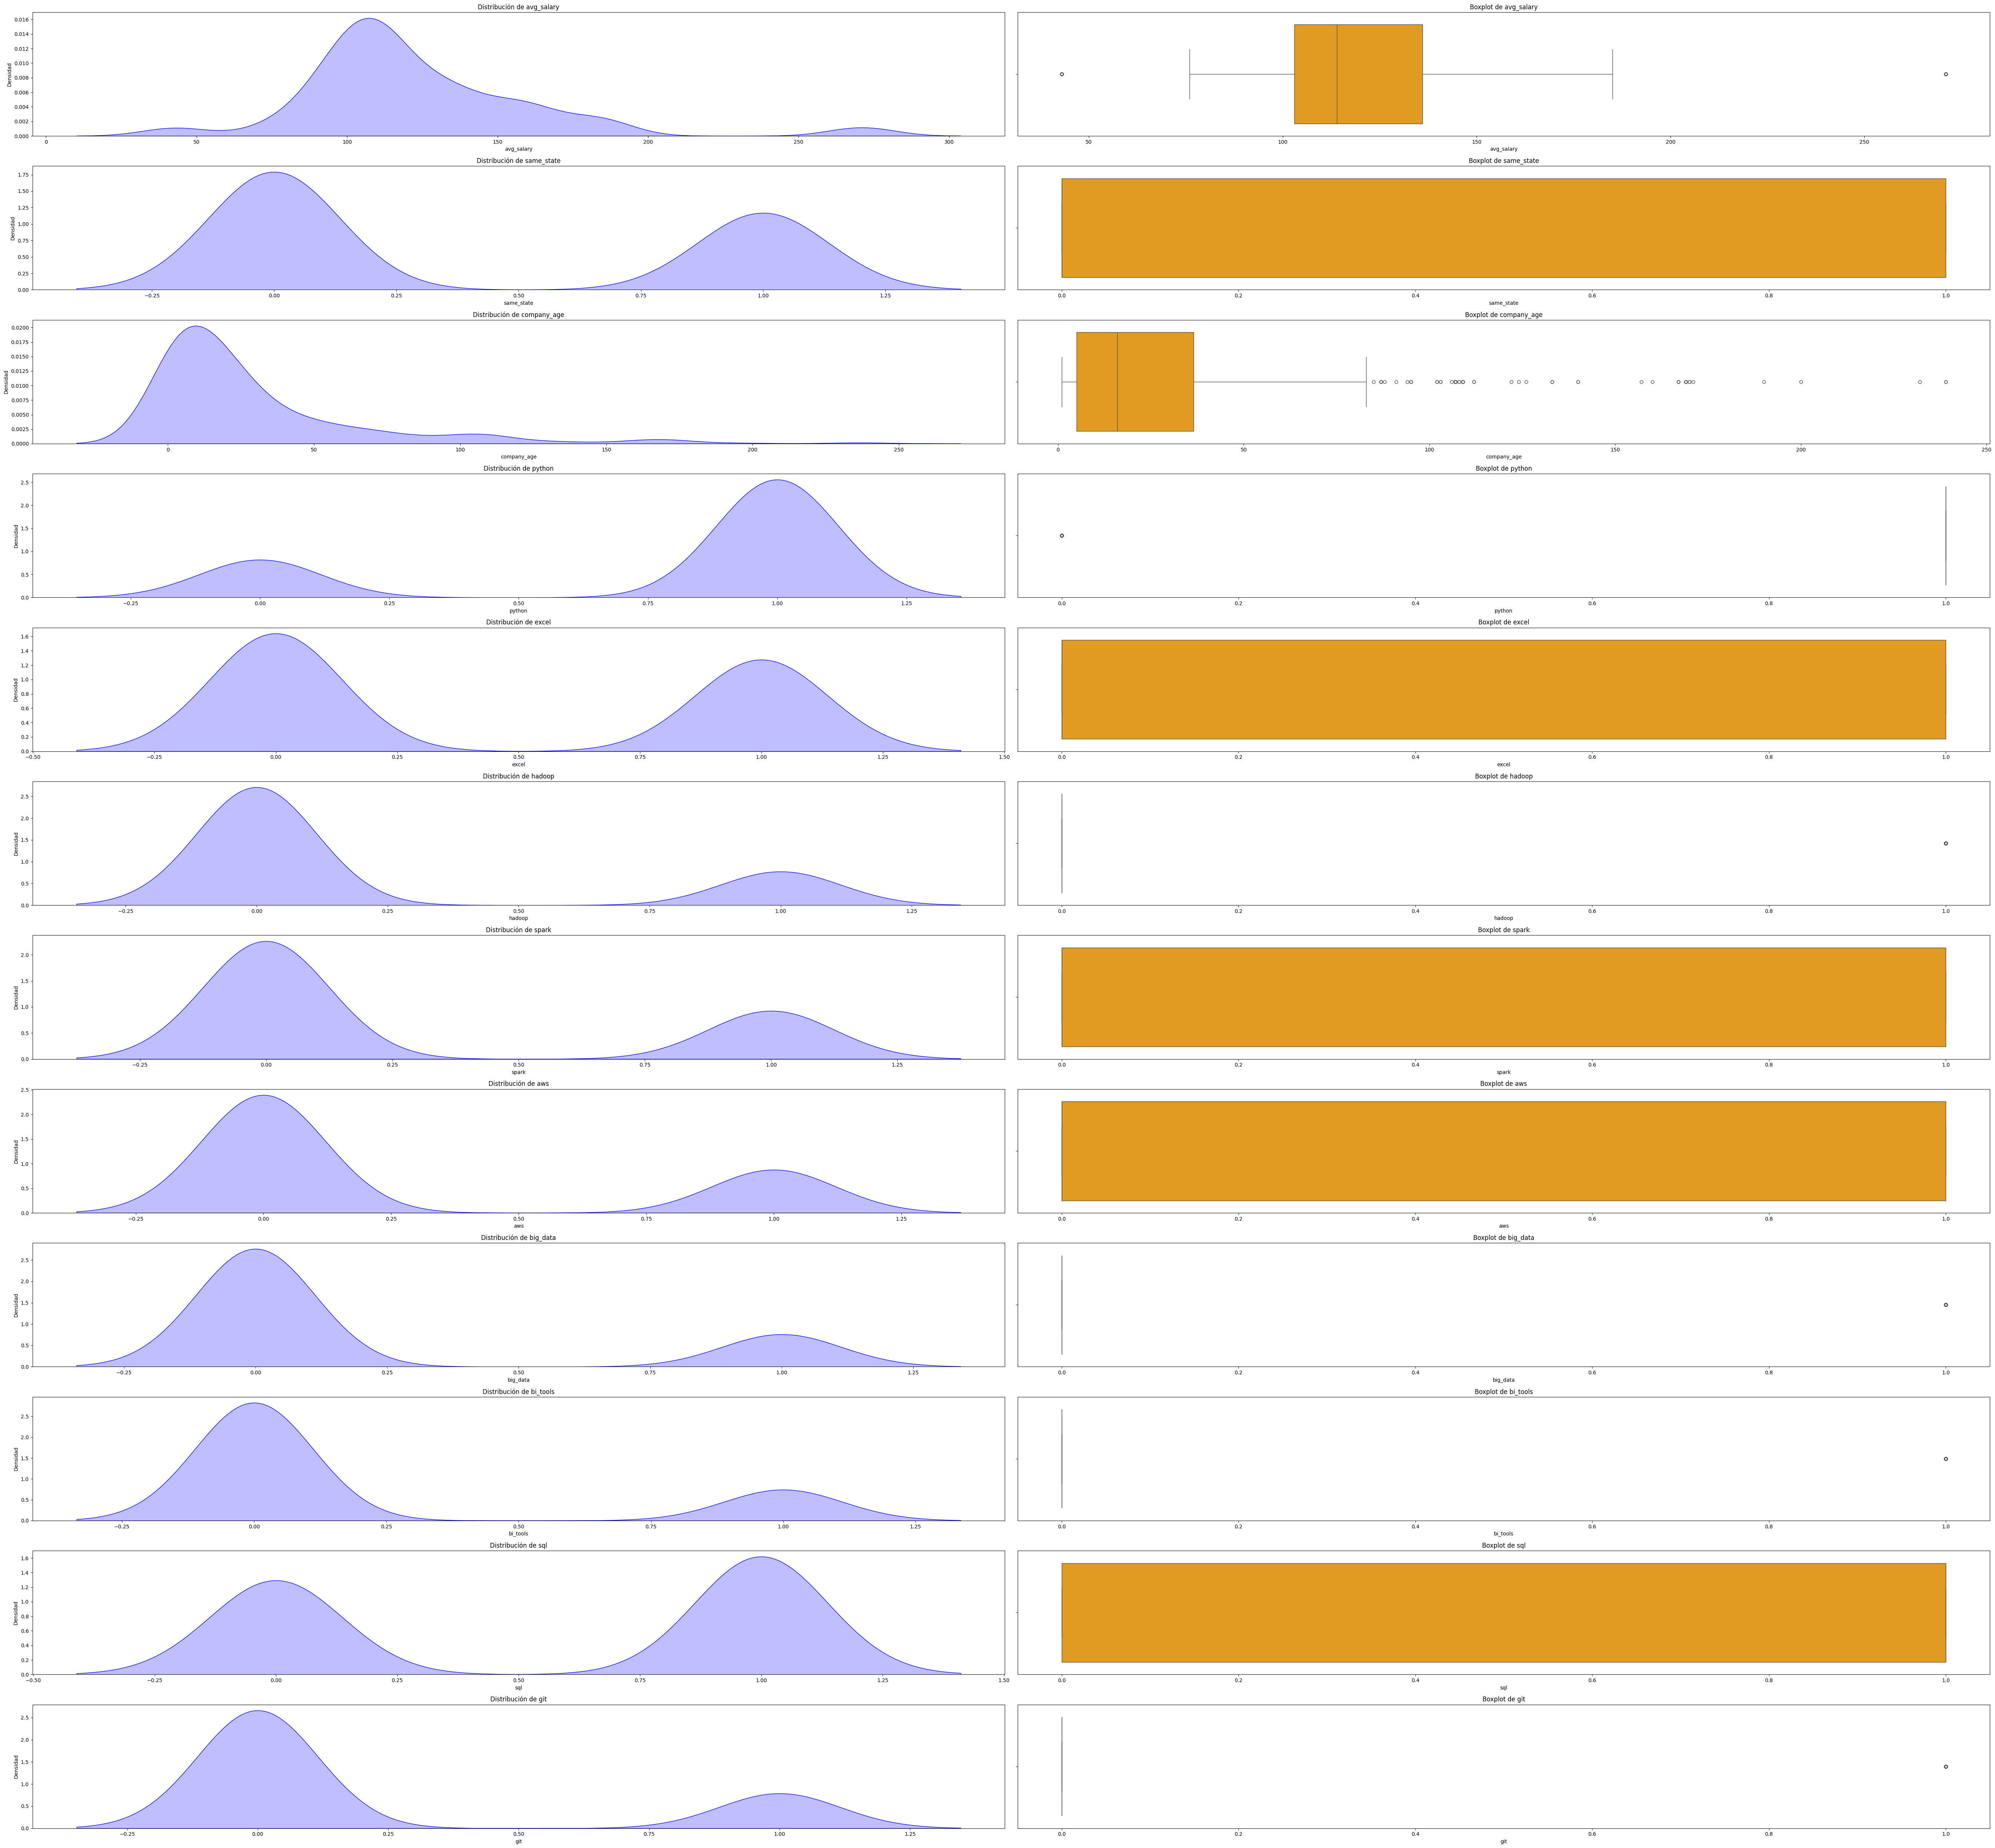

In [37]:
# Obtener las columnas numéricas de X
columns = columnas_numericas.columns

# Configurar el tamaño de las figuras
plt.figure(figsize=(54, 50))

# Crear subplots para cada columna numérica
for i, columna in enumerate(columns):
    # Diagrama de densidad (KDE)
    plt.subplot(len(columns), 2, 2 * i + 1)
    sns.kdeplot(columnas_numericas[columna], fill=True, color='blue')
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Densidad')

    # Diagrama de caja (Boxplot)
    plt.subplot(len(columns), 2, 2 * i + 2)
    sns.boxplot(x=columnas_numericas[columna], color='orange')
    plt.title(f'Boxplot de {columna}')
    plt.xlabel(columna)

# Ajustar el layout para evitar solapamiento
plt.tight_layout()
plt.show()

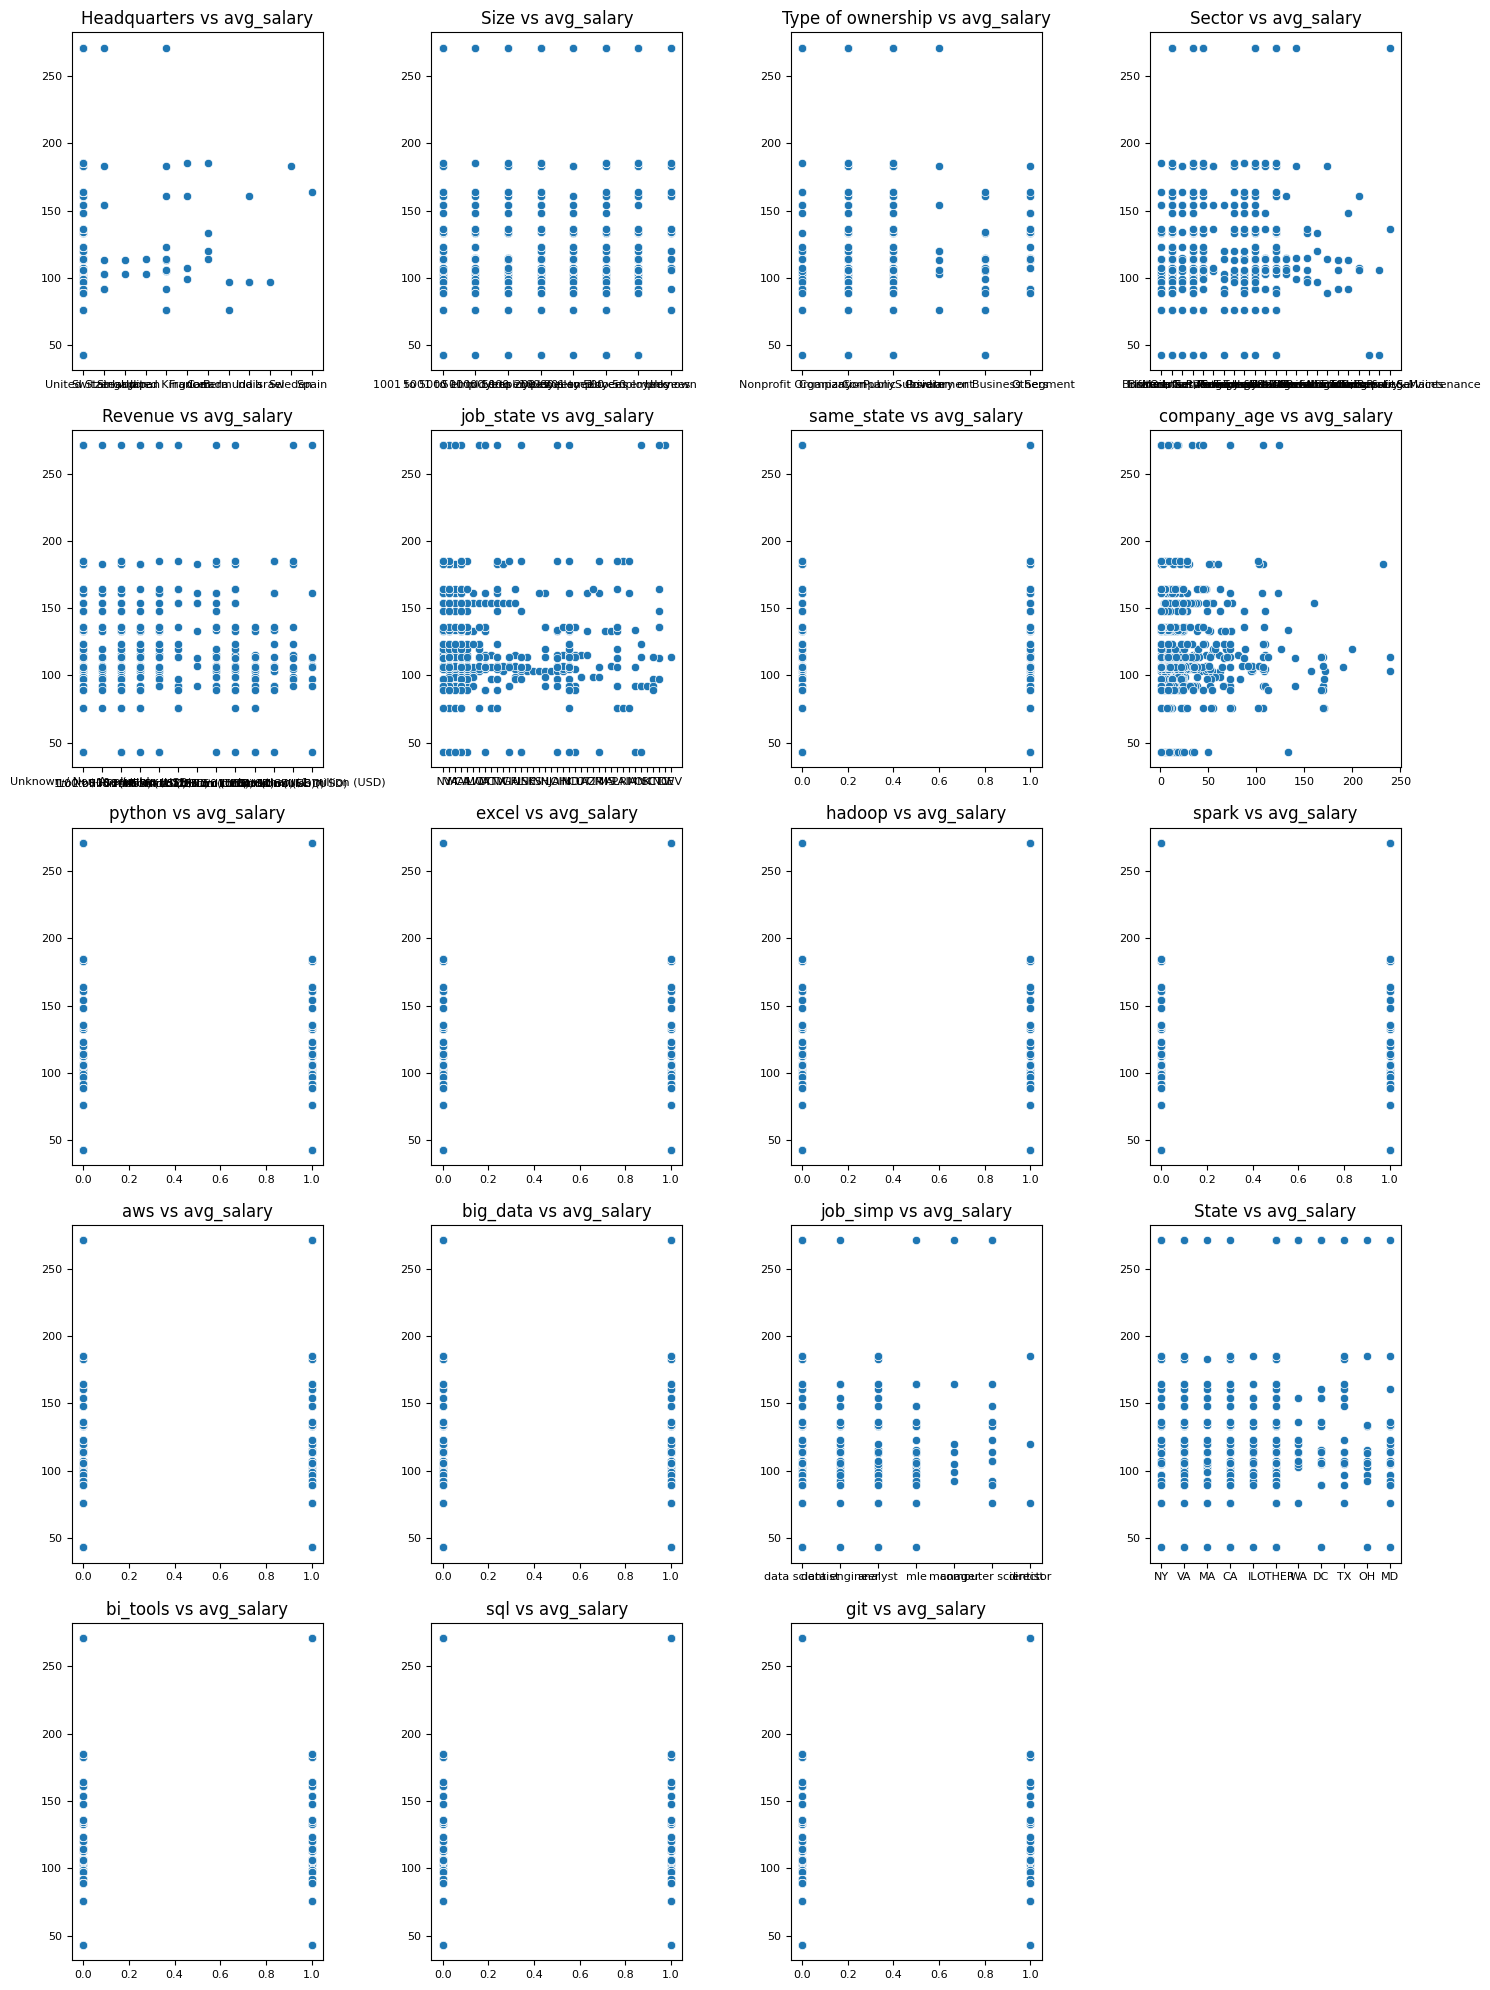

In [42]:
# Lista de todas las columnas en el DataFrame
columnas = job_positions.columns

# Filtramos para evitar la columna objetivo 'avg_salary' en las comparaciones
columnas = [col for col in columnas if col != 'avg_salary']

# Número de gráficos y organización en una cuadrícula
num_vars = len(columnas)
ncols = 4  # Número de columnas en la cuadrícula
nrows = (num_vars + ncols - 1) // ncols  # Calcula el número de filas necesarias

# Crear una figura con una cuadrícula de subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 4))

# Si solo hay un subplot, axes no es una lista, sino un objeto de tipo Axes
if num_vars == 1:
    axes = [axes]

# Crear gráficos de dispersión para cada variable
for ax, col in zip(axes.flat, columnas):
    sns.scatterplot(data=job_positions, x=col, y='avg_salary', ax=ax)
    ax.set_title(f'{col} vs avg_salary')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.tick_params(axis='both', which='minor', labelsize=6)

# Eliminar los subplots vacíos (si los hay)
for ax in axes.flat[num_vars:]:
    ax.remove()

# Ajustar el diseño para que no se superpongan las etiquetas
plt.tight_layout()
plt.show()

##### Guardamos finalmente nuestro dataset en un nuevo .csv

In [35]:
#job_positions.to_csv('./dataset/Cleaned_job_position.csv', index=False) 